In [1]:
# This command installs a Python package directly from a GitHub repository.
# It uses pip to install the Tagalog Stemmer package from the repository hosted at the given URL.
!pip install git+https://github.com/andrianllmm/tagalog-stemmer.git@main

  Cloning https://github.com/andrianllmm/tagalog-stemmer.git (to revision main) to c:\users\my pc\appdata\local\temp\pip-req-build-iruo0m2b
  Resolved https://github.com/andrianllmm/tagalog-stemmer.git to commit b5babfd4caebf8a8f480f8adab9f1c97f42a3baa
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


DEPRECATION: Loading egg at c:\users\my pc\appdata\roaming\python\python311\site-packages\fonttools-4.51.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\my pc\appdata\roaming\python\python311\site-packages\gluoncv-0.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Running command git clone --filter=blob:none --quiet https://github.com/andrianllmm/tagalog-stemmer.git 'C:\Users\MY PC\AppData\Local\Temp\pip-req-build-iruo0m2b'


In [2]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Importing visualization libraries
import matplotlib.pyplot as plt  # For plotting and data visualization
from matplotlib import style  # For setting plot styles
import seaborn as sns  # For advanced data visualization (heatmaps, categorical plots)

# Importing Natural Language Toolkit (nltk) for NLP operations
import nltk
nltk.download('punkt')  # Downloading 'punkt' tokenizer for sentence and word tokenization

# Importing functions from nltk for stopwords and tokenization
from nltk.corpus import stopwords  # For using stopwords (commonly removed words like 'and', 'the')
from nltk.tokenize import word_tokenize, sent_tokenize  # Functions for word and sentence tokenization

# Importing stemmers (for reducing words to their root form)
from nltk.stem import PorterStemmer, LancasterStemmer  # Porter and Lancaster stemming algorithms

# Importing WordNet lemmatizer (for converting words to their base form using linguistic rules)
from nltk.stem import WordNetLemmatizer

# Importing Tagalog stemmer from the 'tglstemmer' package (assumed installed in earlier command)
from tglstemmer import stemmer  # Tagalog language stemmer

# Importing vectorizers from scikit-learn for creating document-term matrices (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # TF-IDF and Count vectorization

# Defining a set of stop words for use in text processing
stop_words = set(nltk.corpus.stopwords.words('english'))  # Stop words in English

# Downloading 'wordnet' corpus for lemmatization
nltk.download('wordnet')

# Importing regular expression library for text manipulation and pattern matching
import re  # For regex operations such as cleaning text data


[nltk_data] Downloading package punkt to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Reading Tagalog stopwords from a text file
# 'tagalog_stop_words.txt' is assumed to be a file containing a list of stopwords in Tagalog.
# The file is read as a DataFrame using pandas.
tagalog_stopwords = pd.read_csv("tagalog_stop_words.txt")

# Extracting the 'stopwords' column from the DataFrame and converting it to a Python list
# Assuming the file has a column named 'stopwords' that contains the actual stop words.
tagalog_stopwords = tagalog_stopwords['stopwords'].tolist()

# Output the list of Tagalog stopwords
tagalog_stopwords


['ako',
 'sa',
 'akin',
 'ko',
 'aking',
 'sarili',
 'kami',
 'atin',
 'ang',
 'aming',
 'amin',
 'ating',
 'ka',
 'iyong',
 'iyo',
 'inyong',
 'siya',
 'kanya',
 'mismo',
 'ito',
 'nito',
 'kanyang',
 'sila',
 'nila',
 'kanila',
 'kanilang',
 'kung',
 'ano',
 'alin',
 'sino',
 'kanino',
 'na',
 'mga',
 'iyon',
 'am',
 'ay',
 'maging',
 'naging',
 'mayroon',
 'may',
 'nagkaroon',
 'pagkakaroon',
 'gumawa',
 'ginagawa',
 'ginawa',
 'paggawa',
 'ibig',
 'dapat',
 'maaari',
 'marapat',
 'kong',
 'ikaw',
 'tayo',
 'hindi',
 'namin',
 'gusto',
 'nais',
 'niyang',
 'nilang',
 'niya',
 'huwag',
 'ginawang',
 'gagawin',
 'maaaring',
 'sabihin',
 'narito',
 'kapag',
 'ni',
 'nasaan',
 'bakit',
 'paano',
 'kailangan',
 'walang',
 'katiyakan',
 'isang',
 'at',
 'pero',
 'o',
 'dahil',
 'bilang',
 'hanggang',
 'habang',
 'ng',
 'pamamagitan',
 'para',
 'tungkol',
 'laban',
 'pagitan',
 'panahon',
 'bago',
 'pagkatapos',
 'itaas',
 'ibaba',
 'mula',
 'pataas',
 'pababa',
 'palabas',
 'ibabaw',
 'il

In [4]:
# Combining English and Tagalog stopwords into a single list
# The stopwords from nltk (in English) are combined with the Tagalog stopwords previously loaded from a file.
# This allows you to remove both English and Tagalog stopwords from text in one step.
all_stopwords = stopwords.words('english') + tagalog_stopwords

# The resulting 'all_stopwords' will contain stopwords from both languages.


In [5]:
# Reading the English dataset from a CSV file
# 'English - Sheet1.csv' is assumed to contain text data in English.
# The dataset is loaded as a pandas DataFrame.
english_dataset = pd.read_csv('English - Sheet1.csv')

# Converting all data in the English dataset to string type
# Ensures that all values in the DataFrame are treated as text, regardless of their original format.
english_dataset = english_dataset.astype(str)

# Reading the Taglish (Tagalog-English mixed) dataset from a CSV file
# 'Taglish - Sheet1.csv' is assumed to contain text data in a mix of Tagalog and English.
# The dataset is loaded as a pandas DataFrame.
taglish_dataset = pd.read_csv('Taglish - Sheet1.csv')

# Converting all data in the Taglish dataset to string type
# Ensures that all values are treated as text, similar to the English dataset.
taglish_dataset = taglish_dataset.astype(str)


In [6]:
def clean_text(text, lang):
    # Remove any character that is not a letter or whitespace using regex
    # This step removes punctuation, numbers, and special characters, leaving only letters and spaces.
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Initialize the WordNet Lemmatizer (for reducing words to their base form)
    le = WordNetLemmatizer()
    
    # Tokenize the text into individual words
    word_tokens = word_tokenize(text)
    
    # Lemmatize each word token and remove stopwords (words in 'all_stopwords') and tokens shorter than 3 characters
    tokens = [le.lemmatize(w) for w in word_tokens if w not in all_stopwords and len(w) > 3]
    
    # Stemming based on language
    if lang == 'taglish':
        # If the language is English, use the Tagalog stemmer ('stemmer' assumed to be the English stemmer)
        stemmed_tokens = [stemmer.get_stem(token) for token in tokens]
    else:
        # For other languages (assumed to be English), use the PorterStemmer for stemming
        ps = PorterStemmer()
        stemmed_tokens = [ps.stem(token) for token in tokens]
    
    # Join the processed tokens back into a single string
    cleaned_text = " ".join(stemmed_tokens)
    
    # Return the cleaned and processed text
    return cleaned_text


In [7]:
# Applying the 'clean_text' function to the 'Content' column of the English dataset
# For each row in the 'Content' column, it calls the 'clean_text' function, specifying "english" as the language.
english_dataset['Content'] = english_dataset['Content'].apply(lambda x: clean_text(x, "english"))

# Applying the 'clean_text' function to the 'Content' column of the Taglish dataset
# Here, the language is specified as "taglish", which will use the PorterStemmer instead of the Tagalog stemmer.
taglish_dataset['Content'] = taglish_dataset['Content'].apply(lambda x: clean_text(x, "taglish"))


In [8]:
# Initializing the TfidfVectorizer
# This vectorizer converts the text into a matrix of TF-IDF features.
# 'stop_words=all_stopwords' specifies that the TF-IDF vectorizer should ignore both English and Tagalog stopwords.
# 'max_features=1000' limits the number of features (terms) to 1000, keeping only the most important ones based on TF-IDF scores.
vect = TfidfVectorizer(stop_words=all_stopwords, max_features=1000)

# Applying the vectorizer to the 'Content' column of the English dataset
# The fit_transform method learns the vocabulary and creates the document-term matrix (DTM) based on TF-IDF scores.
vect_text = vect.fit_transform(english_dataset['Content'])


In [9]:
# Printing the shape of the TF-IDF matrix
# This will show the dimensions of the matrix, where the first number is the number of documents and the second number is the number of features (terms).
print(vect_text.shape)

# Printing the TF-IDF matrix
# This will display the sparse matrix representation of the TF-IDF features. 
# Each row corresponds to a document, and each column corresponds to a term, with values representing the TF-IDF scores.
print(vect_text)


(202, 1000)
  (0, 985)	0.345928545107108
  (0, 161)	0.3353516750770166
  (0, 15)	0.30323524413215247
  (0, 257)	0.3725801290195427
  (0, 242)	0.44515847775332545
  (0, 868)	0.5608965474777242
  (0, 272)	0.15599398254716315
  (1, 909)	0.32452853006909954
  (1, 837)	0.28139074235537637
  (1, 107)	0.3497625182456974
  (1, 430)	0.42603793293011083
  (1, 724)	0.26348694281825114
  (1, 390)	0.26348694281825114
  (1, 677)	0.2927374647156399
  (1, 597)	0.3297994941209993
  (1, 417)	0.16651632294748422
  (1, 750)	0.3497625182456974
  (1, 905)	0.1681760125683784
  (2, 117)	0.356768331023106
  (2, 850)	0.11223014694329418
  (2, 288)	0.33708590532551824
  (2, 735)	0.33708590532551824
  (2, 275)	0.3218190298778868
  (2, 179)	0.30934508437241204
  (2, 358)	0.3845091519762121
  :	:
  (199, 355)	0.3149869811408587
  (199, 876)	0.2397250902153708
  (199, 272)	0.2930420647362872
  (200, 268)	0.37455218424545145
  (200, 422)	0.37455218424545145
  (200, 832)	0.3475297192993097
  (200, 339)	0.3283569752998

In [10]:
# Extracting the IDF (Inverse Document Frequency) values from the fitted TF-IDF vectorizer
# 'idf_' is an attribute of the TfidfVectorizer object that contains the IDF values for each term in the vocabulary.
idf = vect.idf_

# Creating a dictionary that maps each term to its IDF score
# 'vect.get_feature_names_out()' provides the list of feature names (terms).
# 'idf' contains the IDF scores corresponding to these terms.
dd = dict(zip(vect.get_feature_names_out(), idf))

# Sorting the dictionary by IDF scores in ascending order
# This gives the terms with the lowest IDF scores (i.e., most common across documents) first.
l = sorted(dd, key=dd.get)

In [11]:
# Importing the TruncatedSVD class from scikit-learn
# TruncatedSVD is used for dimensionality reduction, particularly for reducing the dimensions of TF-IDF matrices in topic modeling.
from sklearn.decomposition import TruncatedSVD

# Initializing the TruncatedSVD model
# 'n_components=10' specifies that the dimensionality of the data will be reduced to 10 components (topics).
# 'algorithm='randomized'' indicates the use of randomized SVD, which is more efficient for large datasets.
# 'n_iter=10' specifies the number of iterations for the randomized algorithm.
# 'random_state=42' ensures reproducibility by setting the seed for the random number generator.
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

# Applying the TruncatedSVD model to the TF-IDF matrix to reduce its dimensionality
# 'lsa_top' will contain the transformed data with reduced dimensions (10 components).
lsa_top = lsa_model.fit_transform(vect_text)


In [12]:
# Printing the transformed data obtained from applying TruncatedSVD
# 'lsa_top' contains the data projected onto the reduced-dimensional space (10 components).
print(lsa_top)

# Printing the shape of the transformed data
# This will show the dimensions of the reduced data, where the first number is the number of documents
# and the second number is the number of components (10 in this case).
print(lsa_top.shape)


[[ 0.12407843  0.0592795   0.1524548  ...  0.03355548 -0.18344698
   0.09282683]
 [ 0.19337157  0.05358088 -0.08685814 ... -0.14348484 -0.12555377
   0.02696256]
 [ 0.18613612  0.02536856  0.11340724 ... -0.02514991 -0.10452156
   0.12084894]
 ...
 [ 0.19919182  0.08970831  0.5071581  ... -0.08521826  0.16447519
  -0.13131141]
 [ 0.13199491 -0.01915329  0.10033501 ...  0.06636481 -0.06358571
   0.07187273]
 [ 0.19584585 -0.17595181 -0.12327997 ... -0.11879263  0.11276836
  -0.02373612]]
(202, 10)


In [13]:
# Extracting the representation of the first document in the reduced-dimensional space
# 'lsa_top[0]' gets the vector of the first document across the 10 components (topics).
l = lsa_top[0]

# Iterating over each topic and its score for the first document
# 'enumerate(l)' provides both the index (i.e., topic number) and the score for each topic.
for i, topic in enumerate(l):
    # Printing the topic number and its score multiplied by 100 for better readability
    print("Topic ", i, " : ", topic * 100)


Topic  0  :  12.40784329231433
Topic  1  :  5.927950443927527
Topic  2  :  15.245479715407157
Topic  3  :  3.34314149718355
Topic  4  :  -18.483644105308116
Topic  5  :  4.968589092351858
Topic  6  :  7.373419493260469
Topic  7  :  3.355547819094081
Topic  8  :  -18.344698278055546
Topic  9  :  9.282682751483454


In [14]:
# Printing the shape of the components matrix from the TruncatedSVD model
# 'lsa_model.components_' contains the matrix of the topic-term distributions.
# The shape will be (n_components, n_features), where:
# - n_components is the number of topics (10 in this case)
# - n_features is the number of terms (features) in the TF-IDF matrix (e.g., 1000 if 'max_features=1000')
print(lsa_model.components_.shape)

# Printing the components matrix
# 'lsa_model.components_' is a matrix where each row represents a topic
# and each column represents the importance of a term in that topic.
print(lsa_model.components_)


(10, 1000)
[[ 0.03558808  0.01497473  0.01726364 ...  0.0190164   0.00693097
   0.00464152]
 [ 0.10105989  0.02638101 -0.00542022 ...  0.02803584  0.01511636
   0.02009338]
 [-0.06123893 -0.01390005 -0.01443379 ...  0.0387134  -0.02314129
  -0.0023706 ]
 ...
 [-0.01981753  0.01826212  0.00106834 ...  0.04891063  0.01373942
  -0.02268505]
 [ 0.0213363   0.00890581 -0.01321407 ... -0.01099102 -0.01843812
   0.00789906]
 [ 0.01237587 -0.04460045 -0.00902117 ...  0.00503931  0.00123776
   0.07944406]]


In [15]:
# Getting the feature names (terms) from the TF-IDF vectorizer
# 'vocab' will be a list of all terms (features) used in the TF-IDF matrix.
vocab = vect.get_feature_names_out()

# Iterating over each topic (component) in the LSA model
for i, comp in enumerate(lsa_model.components_):
    # Pairing each term with its weight for the current topic
    vocab_comp = zip(vocab, comp)
    
    # Sorting terms by their weight for the current topic in descending order
    # 'sorted_words' contains the top 10 terms with the highest weights for the topic.
    sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:10]
    
    # Printing the most important words for the current topic
    print("Topic " + str(i) + ": ")
    for t in sorted_words:
        print(t[0], end=" ")  # Printing term names
    print("\n")  # Newline for readability

Topic 0: 
student learn educ person need help teacher provid tool use 

Topic 1: 
think critic creativ lack lead skill human limit could teacher 

Topic 2: 
educ teach task administr teacher autom focu technolog access time 

Topic 3: 
educ lack lead critic creativ person task develop support autom 

Topic 4: 
teacher teach focu learn reduc come person autom aspect workload 

Topic 5: 
need human help person still replac task emot support like 

Topic 6: 
learn autom educ task question kid use peopl interact limit 

Topic 7: 
depend technolog learn individu pace kid increas school platform make 

Topic 8: 
depend provid assist task autom technolog assign administr time increas 

Topic 9: 
interact limit project engag teacher educ lesson question differ languag 



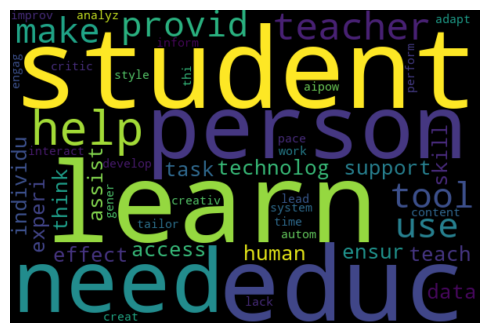

In [16]:
from wordcloud import WordCloud  # Importing WordCloud for visualizing term importance

# Function to generate and display a word cloud for a given topic
def draw_word_cloud(index):
    # Initialize an empty string to hold the important words for the topic
    imp_words_topic = ""
    
    # Retrieve the component (topic-term distribution) for the given index (topic)
    comp = lsa_model.components_[index]
    
    # Pair each term with its weight for the topic
    vocab_comp = zip(vocab, comp)
    
    # Sort terms by their weight in descending order and select the top 50 terms
    sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:50]
    
    # Concatenate the top 50 terms into a single string, separated by spaces
    for word in sorted_words:
        imp_words_topic += " " + word[0]

    # Generate a word cloud image from the concatenated terms
    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    
    # Plot the word cloud
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
    plt.axis("off")  # Hide the axis
    plt.tight_layout()  # Adjust layout to fit elements
    plt.show()  # Display the plot

# Generate and display the word cloud for Topic 0
draw_word_cloud(0)


In [17]:
# Getting the feature names (terms) from the TF-IDF vectorizer
terms = vect.get_feature_names_out()

# Initializing a list to store the most important terms for each topic
topics = []

# Iterating over each topic (component) in the LSA model
for topic_idx, topic in enumerate(lsa_model.components_):
    # Sorting the terms based on their importance (weight) for the current topic
    # 'topic.argsort()' returns indices that would sort the topic weights array
    # '[:-11:-1]' selects the top 10 terms with the highest weights
    # 'topics' will contain lists of the most important terms for each topic
    topics.append([terms[i] for i in topic.argsort()[:-11:-1]])

# 'topics' now contains lists of the top 10 terms for each topic


In [18]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Preprocessing the documents from the Taglish dataset
# Splitting each document into a list of words
processed_docs = [doc.split() for doc in taglish_dataset['Content']]

# Creating a dictionary from the processed documents
# This dictionary maps each word to a unique id, which is used in coherence calculation
dictionary = Dictionary(processed_docs)

# Initializing the CoherenceModel with the following parameters:
# - topics: the list of topics where each topic is a list of top terms
# - texts: the preprocessed documents used for coherence calculation
# - dictionary: the dictionary mapping terms to IDs
# - coherence: the coherence measure to use, 'c_v' in this case
coherence_model_lsa = CoherenceModel(topics=topics, texts=processed_docs, dictionary=dictionary, coherence='c_v')

# Calculating the coherence score for the topics
# The coherence score measures how coherent the topics are, with higher values indicating better coherence
coherence_lsa = coherence_model_lsa.get_coherence()

# Output the coherence score
print("Coherence Score: ", coherence_lsa)


Coherence Score:  0.33665646647929465
